In [19]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

import joblib
import pickle

import matplotlib.pyplot as plt


In [3]:
with open('./dataframes/full_data_clean_df_pickle4.pkl', 'rb') as f:
    df = pickle.load(f)

## 1% of dataset, 500 features

In [7]:
df_subset = df.sample(frac=0.01, replace=False)

In [8]:
docs_cleaned = df_subset['cleaned_bow']

In [9]:
vectorizer = TfidfVectorizer(max_df=0.85,
                             min_df=10,
                             ngram_range=(1,3),
                             max_features=500)
docs_vec = vectorizer.fit_transform(docs_cleaned)
features = vectorizer.get_feature_names()

In [10]:
ks = [k for k in range(50, 301, 50)]
scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(docs_vec)
    score = silhouette_score(docs_vec, kmeans.labels_)
    scores.append(score)
    print(f'k = {k}, silhouette score = {score}')

k = 50, silhouette score = 0.047709275626406644
k = 100, silhouette score = 0.046926728739201576
k = 150, silhouette score = 0.04210847599565598
k = 200, silhouette score = 0.04077264312069481
k = 250, silhouette score = 0.03699523837303974
k = 300, silhouette score = 0.035426872735838194


## 1% of dataset, 1000 features

In [14]:
with open('./flask_app/250k_new_df_pickle_4.pkl', 'rb') as f:
    df = pickle.load(f)

In [15]:
df_subset, df_subset_1 = train_test_split(df, stratify=df['site'], train_size=25000)

In [16]:
docs_cleaned = df_subset['cleaned_bow']

In [17]:
vectorizer = TfidfVectorizer(max_df=0.85,
                             min_df=10,
                             ngram_range=(1,3),
                             max_features=1000)
docs_vec = vectorizer.fit_transform(docs_cleaned)
features = vectorizer.get_feature_names()

In [36]:
ks = [k for k in range(50, 301 , 50)]
scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(docs_vec)
    score = silhouette_score(docs_vec, kmeans.labels_)
    scores.append(score)
    print(f'k = {k}, silhouette score = {score}')

k = 50, silhouette score = 0.036232083770092974
k = 100, silhouette score = 0.04344832675343415
k = 150, silhouette score = 0.04199243609494421
k = 200, silhouette score = 0.04185035482751865
k = 250, silhouette score = 0.038396157451379004
k = 300, silhouette score = 0.03806218116238203


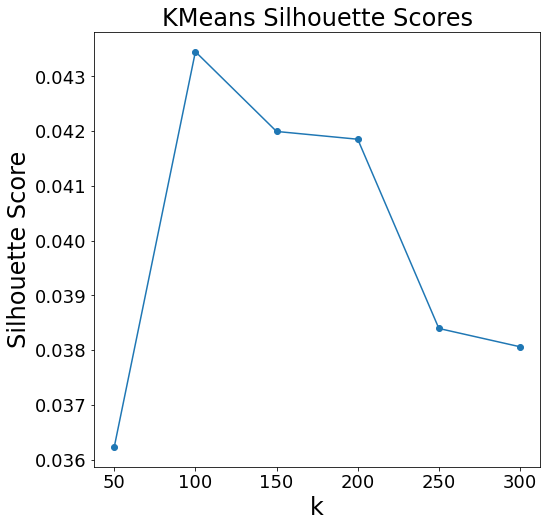

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(ks, scores, linestyle='-', marker='o')
ax.set_xlabel('k', fontsize = 24)
ax.set_ylabel('Silhouette Score', fontsize=24)
ax.tick_params(axis='x', labelsize = 18)
ax.tick_params(axis='y', labelsize=18)
ax.set_title('KMeans Silhouette Scores', fontsize = 24);

In [38]:
k=100
kmeans = KMeans(n_clusters=k)
kmeans.fit(docs_vec)

KMeans(n_clusters=100)

In [39]:
n_features = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-(n_features+1):-1]
print("top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print(f"{num}, {', '.join(features[i] for i in centroid)}")

top features (words) for each cluster:
0, chicken, soup, chicken soup, cream chicken, cream chicken soup, cream, casserol, chees, bake, broth
1, bake, zucchini, soda, flour, bake powder, bake soda, powder bake, powder, powder bake soda, bake powder bake
2, lime, lime juic, juic, avocado, cilantro, fresh, chop, pepper, tablespoon, garlic
3, chicken, breast, chicken breast, pepper, sauc, garlic, salt, oil, cook, bake
4, chees, parmesan, parmesan chees, bake, mozzarella, sauc, grate, pepper, pizza, minut
5, roast, rib, meat, pepper, sauc, hour, onion, garlic, beef, salt
6, flour, sugar, egg, vanilla, butter, add, cream, cake, beat, milk
7, cracker, graham, graham cracker, crumb, cracker crumb, whip, crust, sugar, pie, cool whip
8, pud, cool whip, whip, cool, instant, cake, cream chees, milk, pkg, cream
9, sugar, water, mix, cinnamon, stir, butter, heat, milk, boil, cup
10, crab, meat, mayonnais, sauc, pepper, bread, crumb, chees, worcestershir, bread crumb
11, heat, cook, add, pepper, oil

In [41]:
recipes = df_subset['title']

In [43]:
print("Random sample of texts in each cluster \n")
assigned_cluster = kmeans.transform(docs_vec).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, docs_vec.shape[0])[assigned_cluster==i]
    sample_recipes = np.random.choice(cluster, 10, replace=False)
    
    print(f'\n cluster {i}:')
    for idx in sample_recipes:
        print(f'{recipes.iloc[idx]}')

Random sample of texts in each cluster 


 cluster 0:
Chicken Pot Pie
Crock-Pot Chicken-N-Dressing
Chicken Noodle Casserole
Chicken A La King
No Peek Chicken
Chicken Divan
Creamed Tacos
Cheese Soup
Chicken Enchiladas With Sour Cream
Honey Dijon Chicken (2 Steps)

 cluster 1:
Zucchini Pineapple Bread
Zucchini Bread(Makes 2 Loaves)  
Zucchini Bread(2 Loaves)  
Eggless Cranberry Orange Banana Bread
Low Sodium Carrot Cake
Zucchini Bread - Betty Crocker 1996
Sauerkraut Apple Cake
Gluten-Free Banana Bread Made Easy
Irish Soda Bread And Whiskey Butter
"Low-Fat" Spiced Zucchini Bread

 cluster 2:
Jicama And Pomelo Salad With Spicy Thai Dressing (Vegan) Recipe
Black-Eyed Pea Patties With Garlic Pepper Salsa
Tahitian Tuna (Poisson Cru)
Black Bean, Tomato, And Quinoa Salad
Vietnamese Hot And Sour Soup
Chicken Fajitas
Mom'S Papaya Pie
Sunset Salsa
Spicy Avocado Spread 
Bloody Mary Mix 

 cluster 3:
Buffalo Chicken Pot Pie
Crock Pot Italian Chicken And Vegetables For Two
Chicken Parmesan
Barbecued 

In [44]:
recipe_count = []
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, docs_vec.shape[0])[assigned_cluster==i]
    recipe_count.append(len(cluster))
    print(f"Cluster {i}: {len(cluster)} recipes")

Cluster 0: 294 recipes
Cluster 1: 223 recipes
Cluster 2: 220 recipes
Cluster 3: 554 recipes
Cluster 4: 505 recipes
Cluster 5: 179 recipes
Cluster 6: 291 recipes
Cluster 7: 223 recipes
Cluster 8: 255 recipes
Cluster 9: 870 recipes
Cluster 10: 114 recipes
Cluster 11: 579 recipes
Cluster 12: 181 recipes
Cluster 13: 407 recipes
Cluster 14: 298 recipes
Cluster 15: 180 recipes
Cluster 16: 313 recipes
Cluster 17: 218 recipes
Cluster 18: 99 recipes
Cluster 19: 299 recipes
Cluster 20: 386 recipes
Cluster 21: 272 recipes
Cluster 22: 251 recipes
Cluster 23: 401 recipes
Cluster 24: 172 recipes
Cluster 25: 403 recipes
Cluster 26: 341 recipes
Cluster 27: 202 recipes
Cluster 28: 248 recipes
Cluster 29: 256 recipes
Cluster 30: 205 recipes
Cluster 31: 244 recipes
Cluster 32: 542 recipes
Cluster 33: 78 recipes
Cluster 34: 396 recipes
Cluster 35: 151 recipes
Cluster 36: 379 recipes
Cluster 37: 290 recipes
Cluster 38: 272 recipes
Cluster 39: 223 recipes
Cluster 40: 269 recipes
Cluster 41: 264 recipes
Clus

In [45]:
top_words = []
n_features = 1
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-(n_features+1):-1]
for num, centroid in enumerate(top_centroids):
    top_words.append(', '.join(features[i] for i in centroid))

<ipython-input-46-c7408a2de762>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_words, fontsize = 18, rotation = 90)


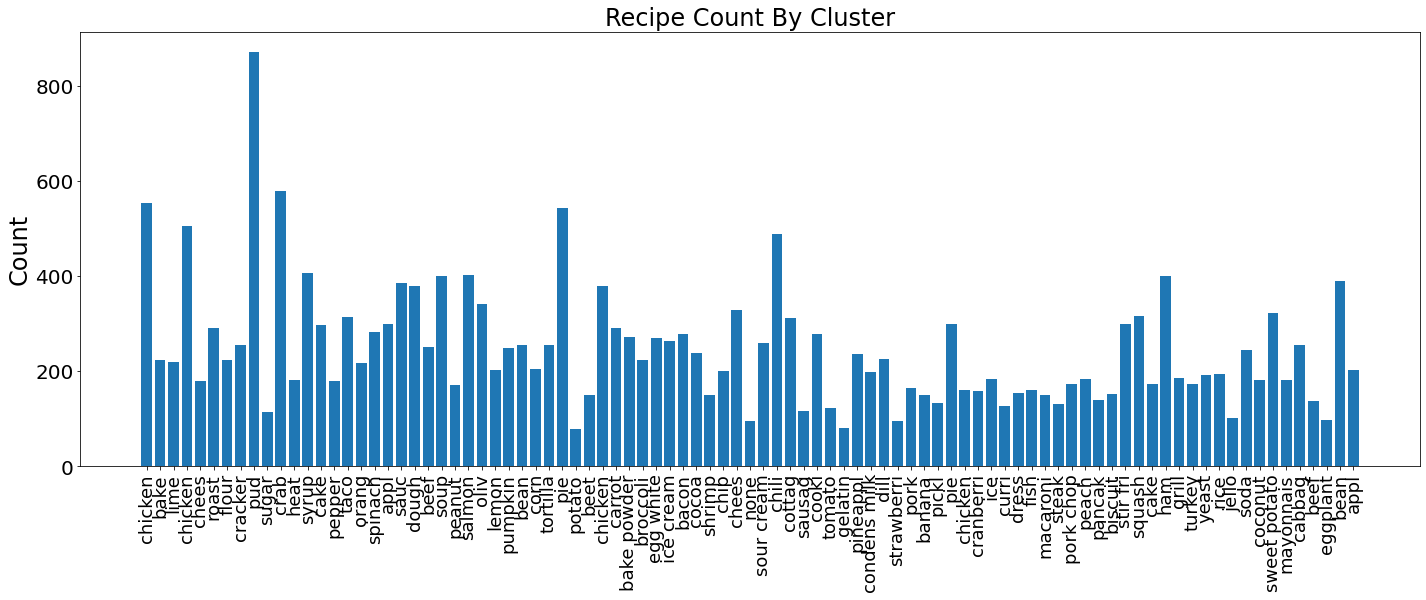

In [46]:
fig, ax = plt.subplots(figsize=(24, 8))
ax.set_title('Recipe Count By Cluster', fontsize = 24)
ax.set_ylabel('Count', fontsize = 24)
plt.yticks(fontsize = 20)
ax.set_xticklabels(top_words, fontsize = 18, rotation = 90)
ax.bar(top_words, recipe_count);

## 10% of dataset

In [4]:
df_subset = df.sample(frac=0.1, replace=False)

In [5]:
docs_cleaned = df_subset['cleaned_bow']

In [6]:
vectorizer = TfidfVectorizer(max_df=0.85,
                             min_df=10,
                             ngram_range=(1,3),
                             max_features=500)
docs_vec = vectorizer.fit_transform(docs_cleaned)
features = vectorizer.get_feature_names()

In [7]:
ks = [k for k in range(30, 111, 10)]
scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(docs_vec)
    score = silhouette_score(docs_vec, kmeans.labels_)
    scores.append(score)
    print(f'k = {k}, silhouette score = {score}')

k = 30, silhouette score = 0.04049612904651607
k = 40, silhouette score = 0.04764845274342668
k = 50, silhouette score = 0.047702802245760505
k = 60, silhouette score = 0.048086012751412485
k = 70, silhouette score = 0.050827572161737646
k = 80, silhouette score = 0.05194200294400169
k = 90, silhouette score = 0.0485384159134092
k = 100, silhouette score = 0.04871354214821216
k = 110, silhouette score = 0.04735985781014062


Depending on kmeans results, should joblib dump 500 max feature vec and different number of num_components for lda model (maybe 80 ish) and put into flask app